# Structure

- optimisation basics
- linear optimisation basics
- solving libraries
- introduction to the PuLP framework
- example: using PuLP to solve a Sudoku puzzle
- example: using PuLP to solve a Nonogram puzzle
- applications

# Python environment setup

In [1]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


In [2]:
# asthetics
figsize(15,5)

# Optimisation basics

- aim to minimise or maximise a single value (same thing mathematically)
- if multiple objectives, define trade-offs betewen them, so still effectively a minimisation of one value

## Terminology
- unconstrained: all variables have domain $[-\infty,\infty]$
    - e.g. Maximise $f(x) = x^2 + 5$, solution $x = 0$
- constrained: some variables have constrained domain
    - e.g. Maximise $f(x) = x^2 +5$ where $x\geq3$, solution $x=3$
- convex: gradients always lead to the global minimum
- non-convex: there can exist local minima -- this can confuse optimisers that only follow the gradient
- multi-dimensional: having more than one control variable

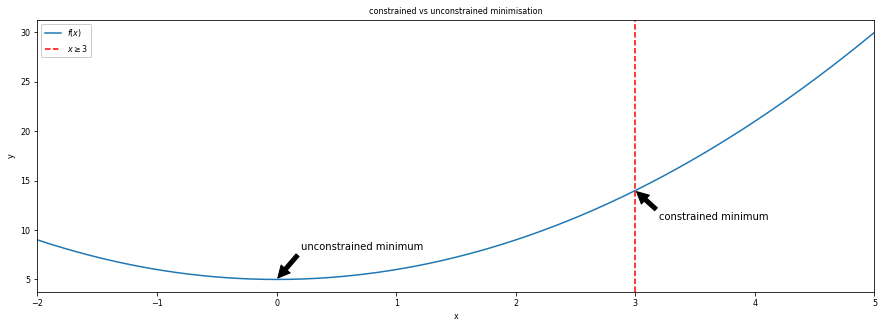

In [3]:
# constrained vs unconstrained minimisation example

title('constrained vs unconstrained minimisation')

def f(x):
    return x**2 + 5

x = linspace(-2,5, 1000)

plot(x,f(x), label='$f(x)$')
xlabel('x');
ylabel('y');

axvline(3, color='r', linestyle='--', label='$x \geq 3$')

xmin = 3
ymin = f(xmin)
annotate('constrained minimum', xy=(xmin,f(xmin)), xytext=(xmin+.2, ymin -3), arrowprops=dict(facecolor='black', shrink=0.05))

xmin = 0
ymin = f(xmin)
annotate('unconstrained minimum', xy=(xmin,f(xmin)), xytext=(xmin+.2, ymin +3), arrowprops=dict(facecolor='black', shrink=0.05))


xlim(-2,5)
legend()
grid(False)

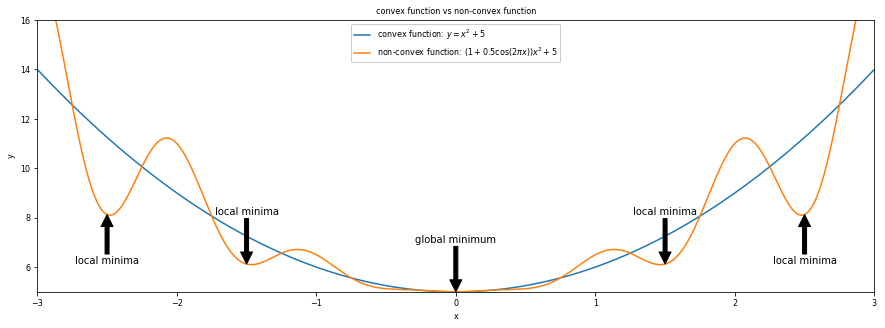

In [4]:
# convex function vs non-convex function

title('convex function vs non-convex function')

def convex(x):
    return x**2 + 5

def nonconvex(x):
    return (1 + 0.5*cos(2*pi*x)) * x**2 + 5

x = linspace(-3,3, 1000)
y = f(x)

plot(x,convex(x), label='convex function: $y = x^2 +5$')
plot(x,nonconvex(x), label='non-convex function: $(1 + 0.5 \cos(2 \pi x))  x^2 + 5$')

xlabel('x');
ylabel('y');

# From inspection it can be seen that minimas will occur when cos(2*pi*x) is at minimum. This occurs periodically whenever 2x is an odd integer. 
# Therefore there will be a minima when x = i + 0.5, where i is in the set of all integers. 


xmin = -2.5
ymin = nonconvex(xmin)
annotate('local minima', xy=(xmin,ymin), ha='center', xytext=(xmin, ymin -2), arrowprops=dict(facecolor='black'))

xmin = -1.5
ymin = nonconvex(xmin)
annotate('local minima', xy=(xmin,ymin), ha='center', xytext=(xmin, ymin +2), arrowprops=dict(facecolor='black'))

xmin = 1.5
ymin = nonconvex(xmin)
annotate('local minima', xy=(xmin,ymin), ha='center', xytext=(xmin, ymin +2), arrowprops=dict(facecolor='black'))

xmin = 2.5
ymin = nonconvex(xmin)
annotate('local minima', xy=(xmin,ymin), ha='center', xytext=(xmin, ymin -2), arrowprops=dict(facecolor='black'))

xmin = 0
ymin = nonconvex(xmin)
annotate('global minimum', xy=(xmin,ymin), ha='center', xytext=(xmin, ymin +2), arrowprops=dict(facecolor='black'))


xlim(-3,3)
ylim(5,16)
legend(loc='upper center')
grid(False)

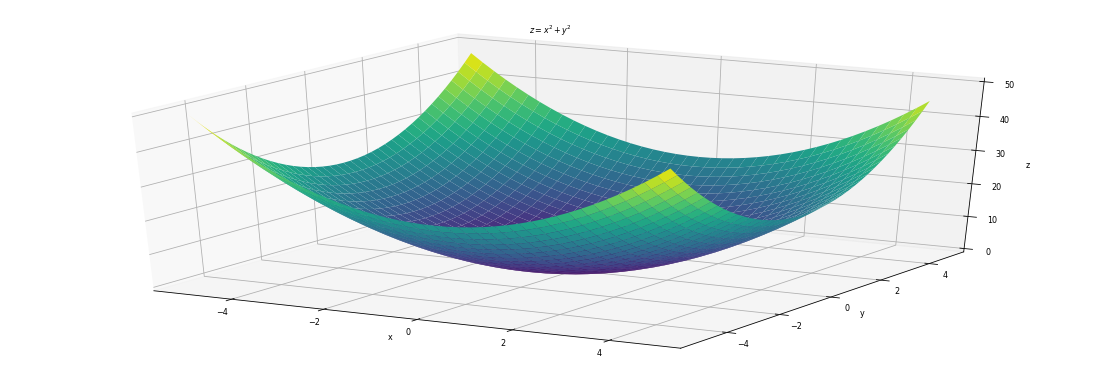

In [5]:
# multidimensional minimisation

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('z');
ax.set_title('$z = x^2 + y^2$');

## Hardness of problems

Common  classifications:

- P: "polynomial time": having [time complexity](https://en.wikipedia.org/wiki/Time_complexity) $O(n^\alpha)$ to get to a solution
    - e.g. graph colouring with 2 colours without any adjacency of the same colour
- NP: "nondeterministic polynomial time", solution can be verified but not solved deterministically in polynomial time
    - e.g. integer factorization problem: given integers n and k, is there a factor f with 1 < f < k and f dividing n?
- EXPTIME: "exponential time"
    - e.g. finding an optimal chess strategy
    
<img src="images/problem_hardness.png", width=300>

Trivia: The question of [whether P=NP is still unsolved](https://en.wikipedia.org/wiki/P_versus_NP_problem). If this is true it has profound implications, for example in cryptographic security. 

# Linear optimisation

- means only linear combinations of decision varaibles:
    - e.g. $\min ( x + y ) $ is ok, but $\min (x y)$ or $ min(x^2 + y)$ is not ok
- is convex as all linear functions are convex
- is constrained (has to be as any unconstrained linear function would have a minimum of negative infinity)
- is solvable in polynomial time (on average) and is therefore <a href="https://en.wikipedia.org/wiki/NP_(complexity)">NP complete</a>

e.g. <br>
Maximise <br>
$x - 5y$ <br>
Subject to <br>
  $x \geq 5$ <br>
  $y \leq 3$ <br>

# Solving linear optimisation problems

- previous example is trivial and can be solved in your head
- but what about a more complex example?

Maximise <br>
$4a+3b-10c+7d-12e+17f-14g-2h$ <br>
Subject to <br>
$15a + 3c -f \geq 2a + h - 14b$ <br>
$18d - e + 3b \leq 32h - 4a + h$ <br>
$3e + 10c -2a \geq 18b - 13f + 17d$ <br>

## Intuition

With two decision variable $x,y$ we can visualise the decision space as a three dimensional object with the $z$ axis as the objective to be minimised. 

Minimise<br>
    $2y-5x$+100<br>
Subject to<br>
    $x \geq 2$<br>
    $x \geq 7 - y$<br>
    $x \leq 2y-9$<br>
    $x \geq y+5$<br>
    $x \leq 13 - y$<br>

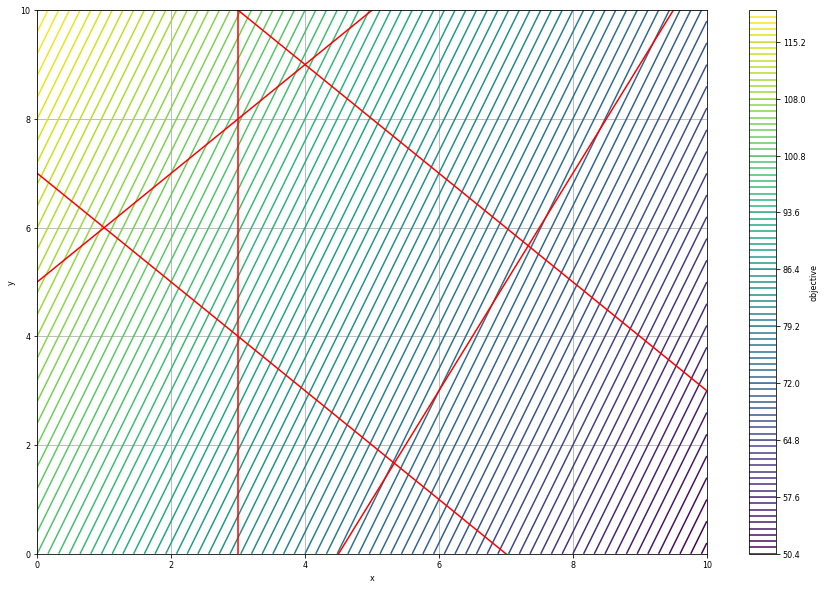

In [6]:
# visual representation of a 2D linear problem

def objective(X, Y):
    return 2*Y - 5*X + 100

x = linspace(0,10,100)
y = linspace(0,10, 100)

X,Y = meshgrid(x,y)

Z = objective(X,Y)

figsize(15,10)

contour(X, Y, Z, 100, cmap=cm.viridis)
colorbar(label='objective')

axvline(3, color='red')
plot(x, 7-y, color='red')
plot(x, 2*y-9, color='red')
plot(x, y+5, color='red')
plot(x, 13-y, color='red')


xlim(0,10)
ylim(0,10)
xlabel('x');
ylabel('y');

## The Simplex Method

- Discovered by George Dantzig in 1946 when a colleague challenged him to mechanise the US military planning process in order to distract him from changing job
- There is an infinate volume to search inside the space, but Dantzig noticed the minimum (it is convex) or maximum will always occur at a corner (in mathematics this is called a simplex) if a feasible solution is available
- Algorithm quite simple:
    1. draw the feasible region
    2. pick a corner and calculate the objective value
    3. calculate the objective for adjacent corners
    4. if it has a better objective value than the current corner, move to this corner, else, you have found the optimal solution

## "The algroithm that runs the world"

Described as ["the algorithm that runs the world" by the New Scientist](http://www.cccblog.org/2012/08/20/the-algorithm-that-runs-the-world/), it is used in almost every aspect of industry, including:

- scheduling
- industrial processes
- logistics
- operations
- product design
- ...

<img src="images/new_scientist_front_cover.jpg" width=300 align="left">

<img src="images/easyjet-plane.jpg" width=300 align="left">

<img src="images/aston-martin-factory.jpg" width=300 align="left">



# Mixed Integer Linear Programming (MILP)

- aka [Integer Programming](https://en.wikipedia.org/wiki/Integer_programming)
- decision variables are integers (binary being a special case)
- complexity is NP-hard, so only huristic solutions available (except for special binary only case)
- very useful for scheduling and production problems
- because of this many algorithms exist to solve this class of problem:
    - LP relaxation: convert integers to continuous vairables, can provide upper limit to global optimum result
    - branch and bound: integer decisions are branching points in a decision tree, if branch best case result is worst than the incumbent it is discarded 
    - ...
- however, you don't need to know them as there are many excellent, mature tools that abstract away their implementation details
- our example will use open source tools:
    - [COIN-OR](https://www.coin-or.org/)'s CLP and CBC solvers and
    - [PuLP](https://pythonhosted.org/PuLP/), a Python problem modelling library

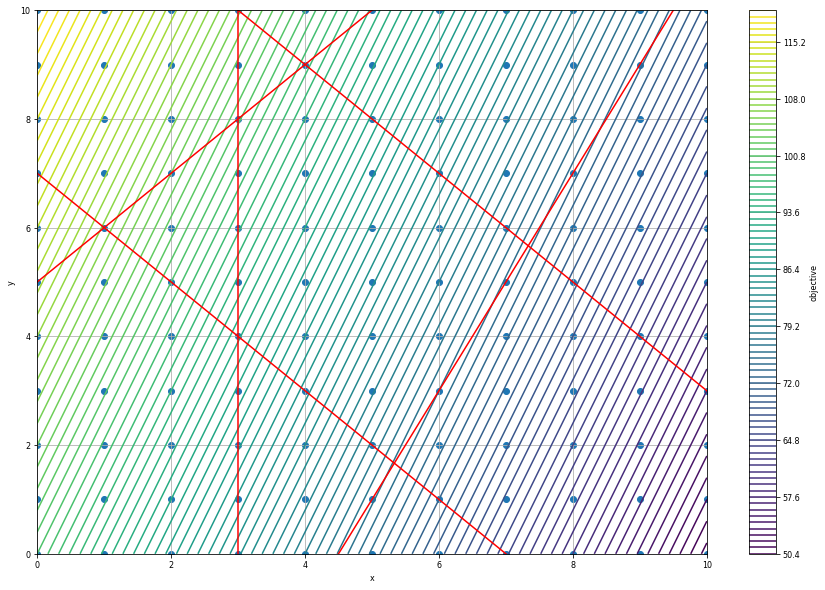

In [7]:
# visual representation of a 2D integer problem

def objective(X, Y):
    return 2*Y - 5*X + 100

x = linspace(0,10,100)
y = linspace(0,10, 100)

X,Y = meshgrid(x,y)

Z = objective(X,Y)

figsize(15,10)

iX,iY = meshgrid(arange(11), arange(11))
scatter(iX,iY)

contour(X, Y, Z, 100, cmap=cm.viridis)
colorbar(label='objective')

axvline(3, color='red')
plot(x, 7-y, color='red')
plot(x, 2*y-9, color='red')
plot(x, y+5, color='red')
plot(x, 13-y, color='red')


xlim(0,10)
ylim(0,10)
xlabel('x');
ylabel('y');

# Solving a Sudoku with PuLP

- [Sudoku puzzels](https://en.wikipedia.org/wiki/Sudoku) require the player to complete the missing numbers on the grid in such a way that each row, column and 3x3 box contains each number in the set $\{1,...,9\}$

- the [PuLP package](https://pythonhosted.org/PuLP/) makes describing these rules in linear form easy

## Install PuLP

- We will install from the [PyPi Python package repository](https://pypi.python.org/pypi/PuLP) using the `pip` command line tool
- In Jupyter Notebook we can execute shell commands by using the `!` prefix

In [127]:
!pip install pulp

    100% |████████████████████████████████| 13.5MB 129kB/s eta 0:00:01
  Running setup.py bdist_wheel for pulp ... done
  Stored in directory: /Users/james.schofield/Library/Caches/pip/wheels/d0/73/a3/85621bee86fa3dc23ddc3e0b19d8dcf58e3bc232ccd05793ed
Successfully built pulp


## Build the linear program

- We will solve the [Sudoku puzzle example from Wikipedia](https://en.wikipedia.org/wiki/Sudoku)

- This example is also presented in the [PuLP documentation](https://pythonhosted.org/PuLP/CaseStudies/a_sudoku_problem.html), but I prefer to lay it out a bit differently

<img src="images/sudoku-unsolved.png" width="300px" align="left">
<img src="images/sudoku-solved.png" width="300px" align="right">

In [8]:
# import the PuLP library
import pulp as lp

In [9]:
# initialise a blank problem instance 
prob = lp.LpProblem(name="sudoku problem", sense=lp.LpMinimize)

We just have to find a feasible solution, so there is not cost function.

In [10]:
# set the problem to have cost function of zero
prob += 0, "arbitrary objective function"

Our decision variables will be binary, one for each number that we can choose to be place in a square. This gives us a total of 9 x 9 x 9 binary decision variables. 

In [11]:
# create the binary decision variables 
# so that we can use numpy's fancy indexing, we will store the decision varaibles in a numpy array

# create a list of possible number chars for each box
number_chars = list('123456789')

# create a 3d array for decision vars (rows, columns, number_choices)
variables = empty((9,9,9), dtype='object')


for row in range(9):
    for col in range(9):
        for num in range(9):
            # make variable name
            srow = str(row)
            scol = str(col)
            nc = number_chars[num]
            name = '{}_{}_{}'.format(srow,scol,nc)
            var = lp.LpVariable(name, cat='Binary')
            
            # place variable in array
            variables[row,col,num] = var

In [12]:
print(variables)

[[[0_0_1 0_0_2 0_0_3 0_0_4 0_0_5 0_0_6 0_0_7 0_0_8 0_0_9]
  [0_1_1 0_1_2 0_1_3 0_1_4 0_1_5 0_1_6 0_1_7 0_1_8 0_1_9]
  [0_2_1 0_2_2 0_2_3 0_2_4 0_2_5 0_2_6 0_2_7 0_2_8 0_2_9]
  [0_3_1 0_3_2 0_3_3 0_3_4 0_3_5 0_3_6 0_3_7 0_3_8 0_3_9]
  [0_4_1 0_4_2 0_4_3 0_4_4 0_4_5 0_4_6 0_4_7 0_4_8 0_4_9]
  [0_5_1 0_5_2 0_5_3 0_5_4 0_5_5 0_5_6 0_5_7 0_5_8 0_5_9]
  [0_6_1 0_6_2 0_6_3 0_6_4 0_6_5 0_6_6 0_6_7 0_6_8 0_6_9]
  [0_7_1 0_7_2 0_7_3 0_7_4 0_7_5 0_7_6 0_7_7 0_7_8 0_7_9]
  [0_8_1 0_8_2 0_8_3 0_8_4 0_8_5 0_8_6 0_8_7 0_8_8 0_8_9]]

 [[1_0_1 1_0_2 1_0_3 1_0_4 1_0_5 1_0_6 1_0_7 1_0_8 1_0_9]
  [1_1_1 1_1_2 1_1_3 1_1_4 1_1_5 1_1_6 1_1_7 1_1_8 1_1_9]
  [1_2_1 1_2_2 1_2_3 1_2_4 1_2_5 1_2_6 1_2_7 1_2_8 1_2_9]
  [1_3_1 1_3_2 1_3_3 1_3_4 1_3_5 1_3_6 1_3_7 1_3_8 1_3_9]
  [1_4_1 1_4_2 1_4_3 1_4_4 1_4_5 1_4_6 1_4_7 1_4_8 1_4_9]
  [1_5_1 1_5_2 1_5_3 1_5_4 1_5_5 1_5_6 1_5_7 1_5_8 1_5_9]
  [1_6_1 1_6_2 1_6_3 1_6_4 1_6_5 1_6_6 1_6_7 1_6_8 1_6_9]
  [1_7_1 1_7_2 1_7_3 1_7_4 1_7_5 1_7_6 1_7_7 1_7_8 1_7_9]
  [1_8_1 1_8

Encode the rules of the game as linear constraints.

In [13]:
# only one value in each square
for col in range(9):
    for row in range(9):
        prob += lp.lpSum(variables[row,col,:]) == 1

In [14]:
# one of each number in each row
for row in range(9):
    for num in range(9):
        prob += lp.lpSum(variables[row,:,num]) == 1

In [15]:
# one of each number in each column
for col in range(9):
    for num in range(9):
        prob += lp.lpSum(variables[:,col,num]) == 1

In [16]:
# one of each number in each 3x3 square
for col in range(0,9,3):
    for row in range(0,9,3):
        for num in range(9):
            prob += lp.lpSum(variables[col:col+3, row:row+3, num]) == 1

Encode the given numbers as constraints.

<img src="images/sudoku-unsolved.png" width="300px" align="left">

In [17]:
# create an array of the given numbers  [nan,nan,nan,nan,nan,nan,nan,nan,nan],
given = array(
    [
        list('53  7    '),
        list('6  195   '),
        list(' 98    6 '),
        list('8   6   3'),
        list('4  8 3  1'),
        list('7   2   6'),
        list(' 6    28 '),
        list('   419  5'),
        list('    8  79'),
    ]
)

print(given)

[['5' '3' ' ' ' ' '7' ' ' ' ' ' ' ' ']
 ['6' ' ' ' ' '1' '9' '5' ' ' ' ' ' ']
 [' ' '9' '8' ' ' ' ' ' ' ' ' '6' ' ']
 ['8' ' ' ' ' ' ' '6' ' ' ' ' ' ' '3']
 ['4' ' ' ' ' '8' ' ' '3' ' ' ' ' '1']
 ['7' ' ' ' ' ' ' '2' ' ' ' ' ' ' '6']
 [' ' '6' ' ' ' ' ' ' ' ' '2' '8' ' ']
 [' ' ' ' ' ' '4' '1' '9' ' ' ' ' '5']
 [' ' ' ' ' ' ' ' '8' ' ' ' ' '7' '9']]


In [18]:
# fix the given charachters to sum to one so that they have to be chosen
for row in range(9):
    for col in range(9):
        c = given[row,col]
        for num in range(9):
            v = variables[row,col,num]
            if v.name[-1] == c:
                prob += v == 1

In [19]:
# solve the problem and time it
%time prob.solve()

CPU times: user 30.9 ms, sys: 8.58 ms, total: 39.5 ms
Wall time: 73.4 ms


1

In [20]:
# print solution variable values
solution = empty((9,9), dtype=str)

# add variable char to solution array if it was chosen
for row in range(9):
    for col in range(9):
        for num in range(9):
            v = variables[row,col,num]
            # check if variable was chosen
            if v.value() != 0:
                solution[row,col] = v.name[-1]

In [21]:
print(solution)

[['5' '3' '4' '6' '7' '8' '9' '1' '2']
 ['6' '7' '2' '1' '9' '5' '3' '4' '8']
 ['1' '9' '8' '3' '4' '2' '5' '6' '7']
 ['8' '5' '9' '7' '6' '1' '4' '2' '3']
 ['4' '2' '6' '8' '5' '3' '7' '9' '1']
 ['7' '1' '3' '9' '2' '4' '8' '5' '6']
 ['9' '6' '1' '5' '3' '7' '2' '8' '4']
 ['2' '8' '7' '4' '1' '9' '6' '3' '5']
 ['3' '4' '5' '2' '8' '6' '1' '7' '9']]


Compare solution to the example solution:

<img src="images/sudoku-solved.png" width="300px" align="left">